In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import yfinance as yf

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start = start, end = end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,221.767889,222.237999,224.482112,219.624980,221.903008,5.305801e+07
std,15.770354,15.929884,15.473674,16.251510,16.010299,2.746140e+07
min,172.194199,172.419998,190.339996,169.210007,171.949997,2.323470e+07
25%,210.474998,210.474998,212.485001,208.434998,210.200005,3.945800e+07
50%,223.121780,223.750000,225.630005,221.410004,224.009995,4.641400e+07
75%,232.274689,232.834999,234.500000,229.684998,232.605003,5.577750e+07
max,258.396667,259.019989,260.100006,257.630005,258.190002,3.186799e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-07-22 to 2025-07-22
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Close, AAPL)      251 non-null    float64
 2   (High, AAPL)       251 non-null    float64
 3   (Low, AAPL)        251 non-null    float64
 4   (Open, AAPL)       251 non-null    float64
 5   (Volume, AAPL)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [11]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-07-22 to 2025-07-22
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  251 non-null    float64
 1   (Close, GOOG)      251 non-null    float64
 2   (High, GOOG)       251 non-null    float64
 3   (Low, GOOG)        251 non-null    float64
 4   (Open, GOOG)       251 non-null    float64
 5   (Volume, GOOG)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [12]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-07-22 to 2025-07-22
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  251 non-null    float64
 1   (Close, MSFT)      251 non-null    float64
 2   (High, MSFT)       251 non-null    float64
 3   (Low, MSFT)        251 non-null    float64
 4   (Open, MSFT)       251 non-null    float64
 5   (Volume, MSFT)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [13]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-07-22 to 2025-07-22
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  251 non-null    float64
 1   (Close, AMZN)      251 non-null    float64
 2   (High, AMZN)       251 non-null    float64
 3   (Low, AMZN)        251 non-null    float64
 4   (Open, AMZN)       251 non-null    float64
 5   (Volume, AMZN)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

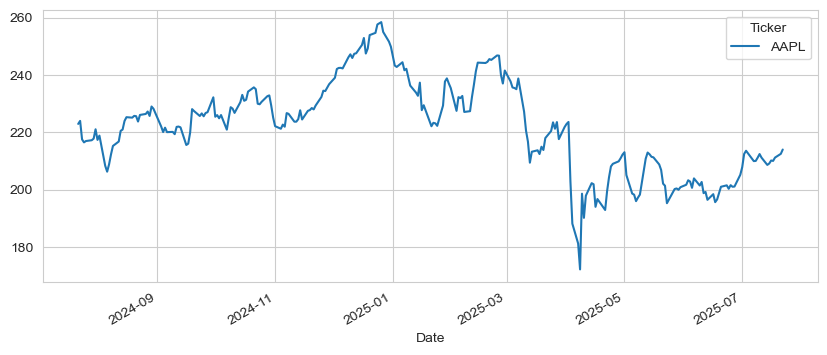

In [14]:
AAPL['Adj Close'].plot(legend = True, figsize = (10, 4))

<Axes: xlabel='Date'>

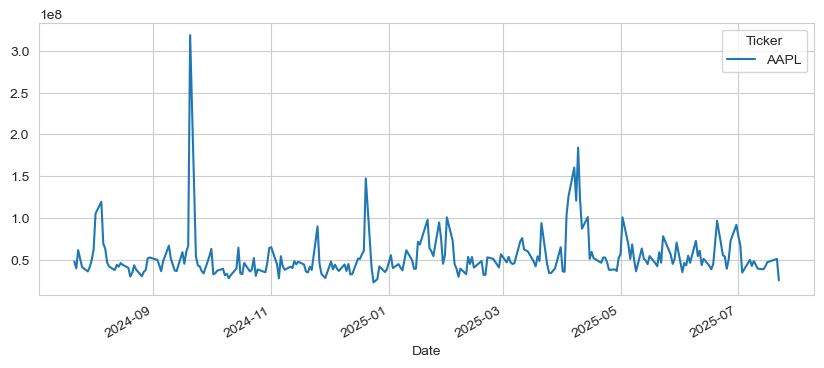

In [15]:
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

In [16]:
ma_days = [10, 20 ,50]

for ma in ma_days:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

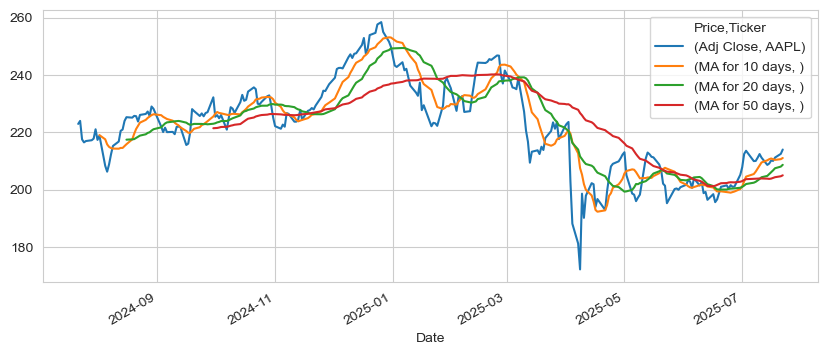

In [17]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10, 4))

<Axes: xlabel='Date'>

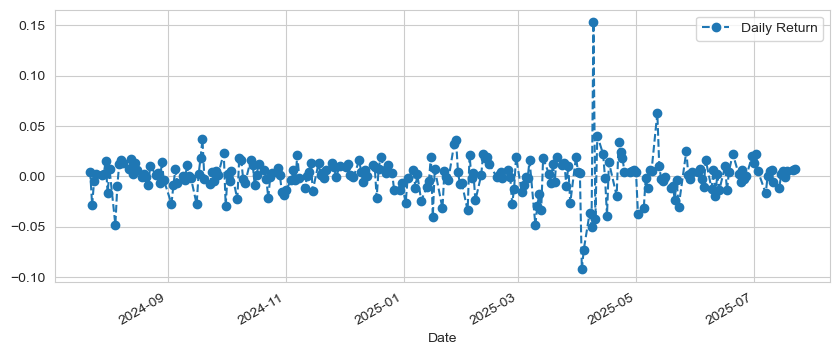

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')

<Axes: xlabel='Daily Return', ylabel='Count'>

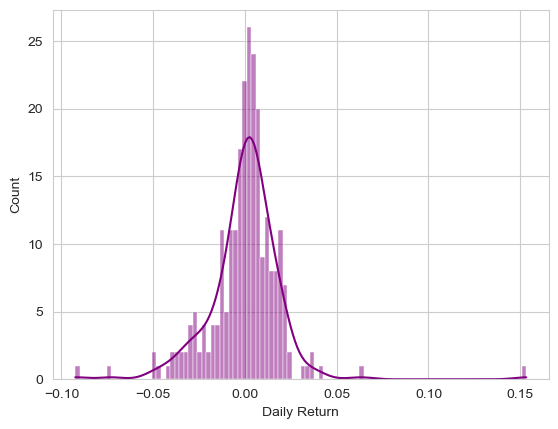

In [19]:
sns.histplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple', kde = True)

<Axes: >

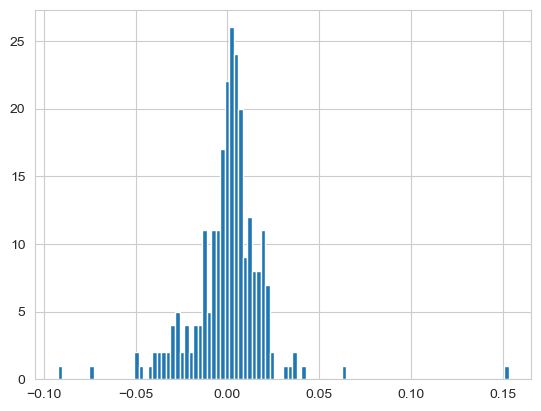

In [20]:
AAPL['Daily Return'].hist(bins = 100)

In [21]:
closing_df = yf.download(tech_list, start = start, end = end, auto_adjust = False)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [22]:
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-07-22,222.917480,182.550003,182.473999,439.569885
2024-07-23,223.962616,186.410004,182.722794,441.465302
2024-07-24,217.522705,180.830002,173.536896,425.636688
2024-07-25,216.477615,179.850006,168.351791,415.216553
2024-07-26,216.945435,182.500000,167.874069,422.034271


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-07-22,NaN,NaN,NaN,NaN
2024-07-23,0.004688,0.021145,0.001363,0.004312
2024-07-24,-0.028754,-0.029934,-0.050272,-0.035855
2024-07-25,-0.004805,-0.005419,-0.029879,-0.024481
2024-07-26,0.002161,0.014734,-0.002838,0.016420


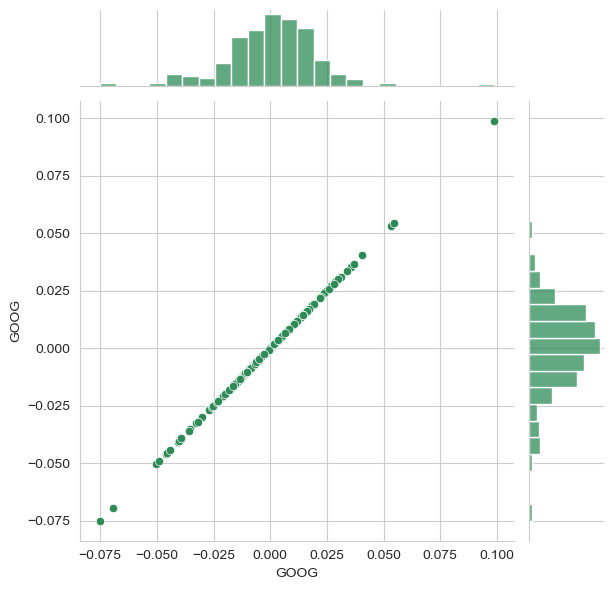

In [25]:
sns.jointplot(x = 'GOOG', y = 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')

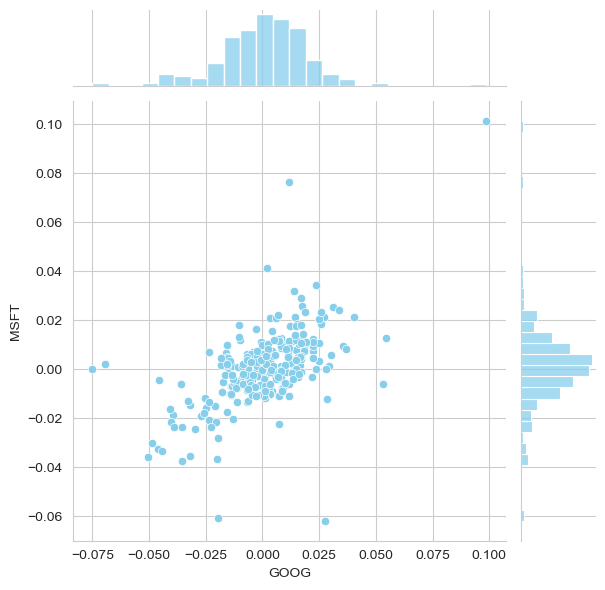

In [26]:
sns.jointplot(x = 'GOOG', y = 'MSFT', data = tech_rets, kind = 'scatter', color = 'skyblue')

In [27]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-07-22,NaN,NaN,NaN,NaN
2024-07-23,0.004688,0.021145,0.001363,0.004312
2024-07-24,-0.028754,-0.029934,-0.050272,-0.035855
2024-07-25,-0.004805,-0.005419,-0.029879,-0.024481
2024-07-26,0.002161,0.014734,-0.002838,0.016420


c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


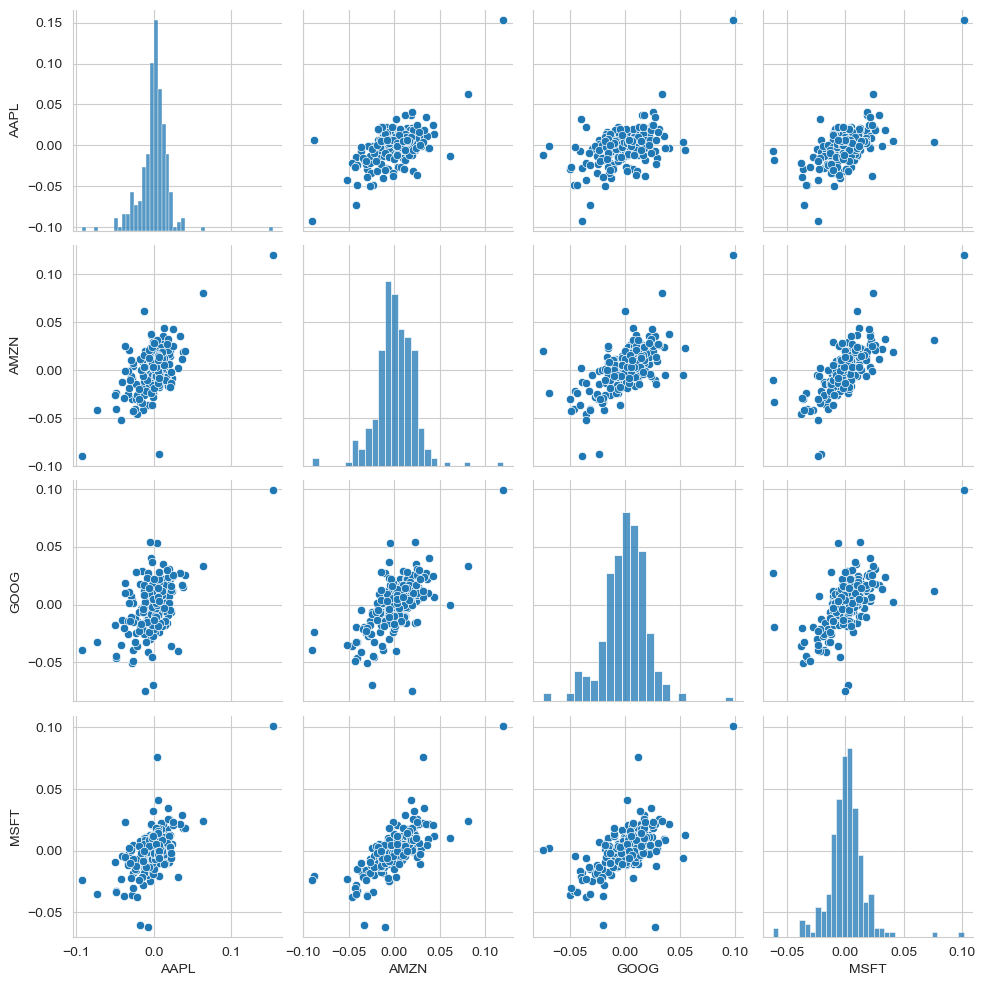

In [28]:
sns.pairplot(tech_rets, dropna = True)

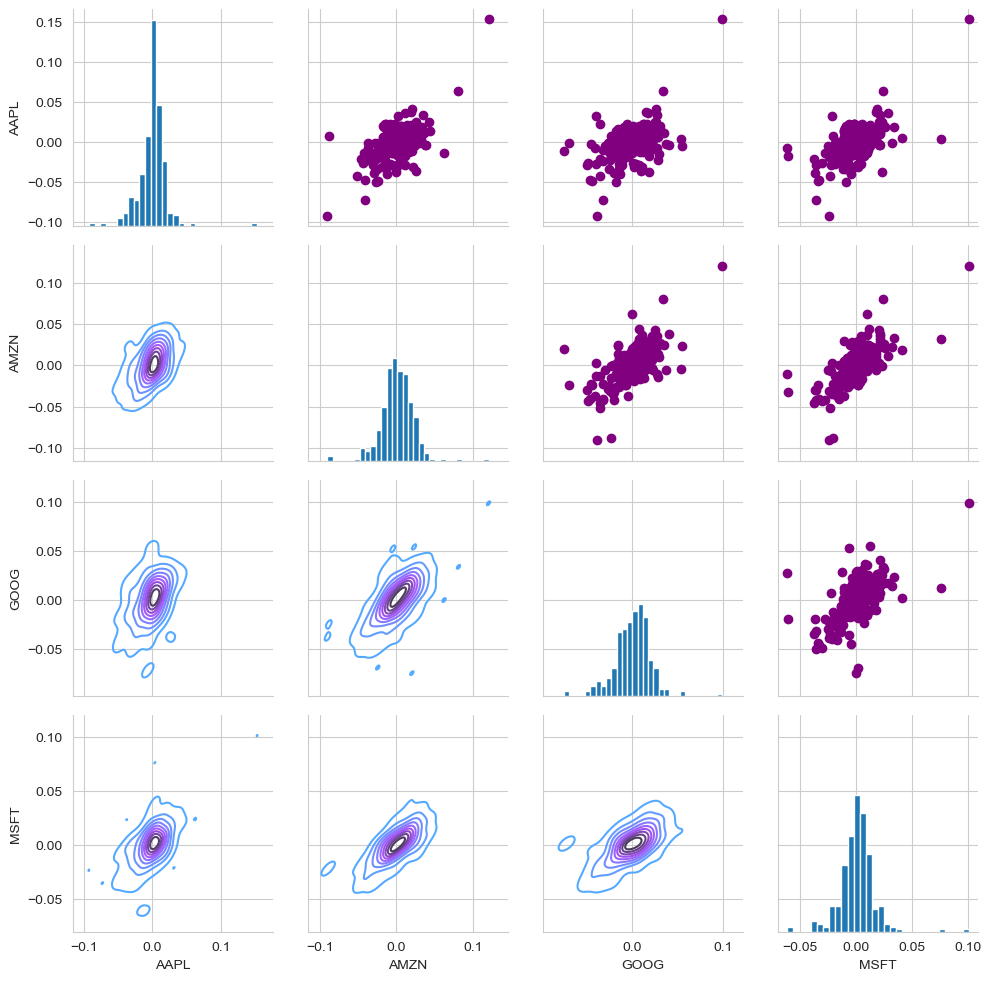

In [29]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)

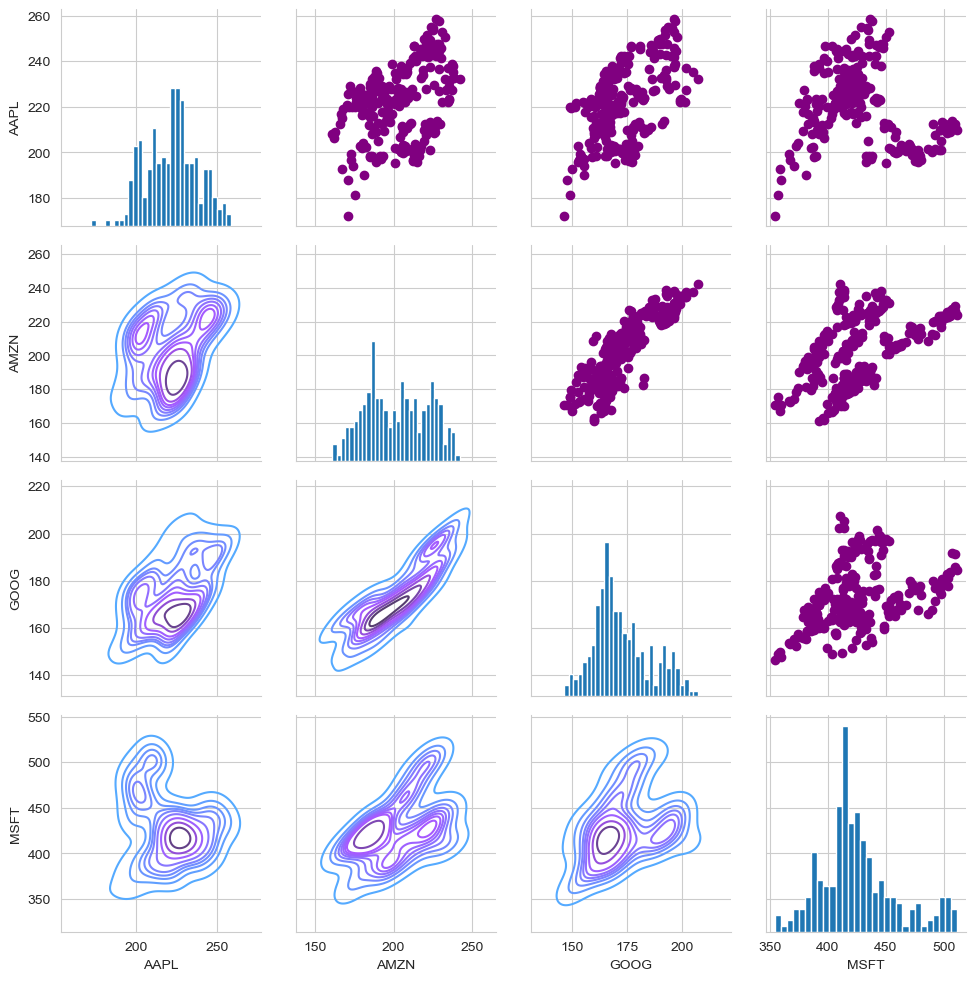

In [30]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

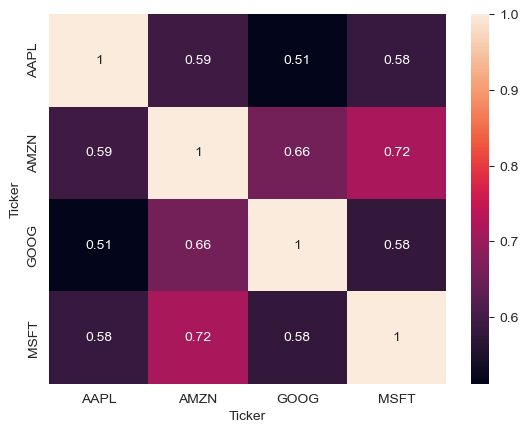

In [31]:
sns.heatmap(tech_rets.dropna().corr(), annot = True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

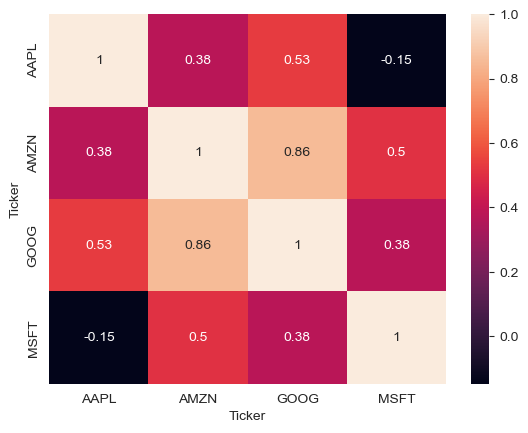

In [32]:
sns.heatmap(closing_df.corr(), annot = True)

In [33]:
rets = tech_rets.dropna()

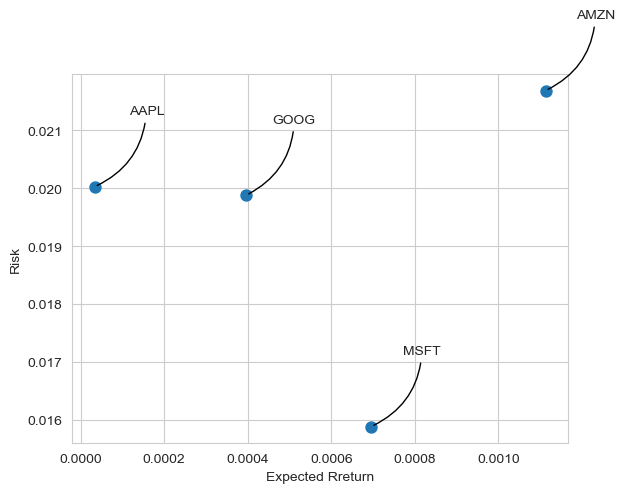

In [34]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Rreturn')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3', color = 'black')
    )

<Axes: xlabel='Daily Return', ylabel='Count'>

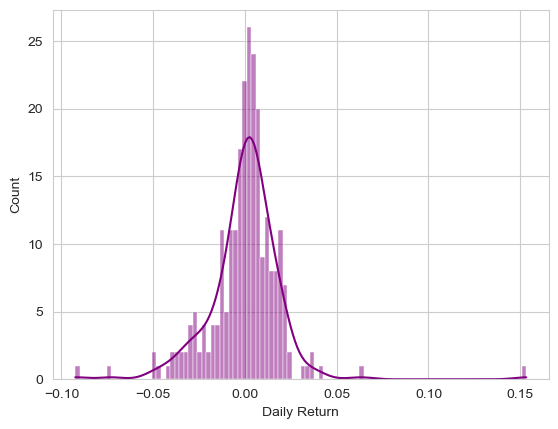

In [35]:
sns.histplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple', kde = True)

In [36]:
rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-07-23,0.004688,0.021145,0.001363,0.004312
2024-07-24,-0.028754,-0.029934,-0.050272,-0.035855
2024-07-25,-0.004805,-0.005419,-0.029879,-0.024481
2024-07-26,0.002161,0.014734,-0.002838,0.016420
2024-07-29,0.001285,0.003836,0.014525,0.003433


In [37]:
rets['AAPL'].quantile(0.05)

-0.031710027903296516

In [38]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [39]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

In [40]:
GOOG.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2024-07-22,182.473999,183.350006,184.300003,181.899994,182.350006,16303900
2024-07-23,182.722794,183.600006,185.220001,183.330002,183.839996,23772600
2024-07-24,173.536896,174.369995,177.949997,173.570007,175.389999,31250700
2024-07-25,168.351791,169.160004,175.199997,169.050003,174.250000,28967900
2024-07-26,167.874069,168.679993,169.839996,165.865005,168.770004,25150100


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

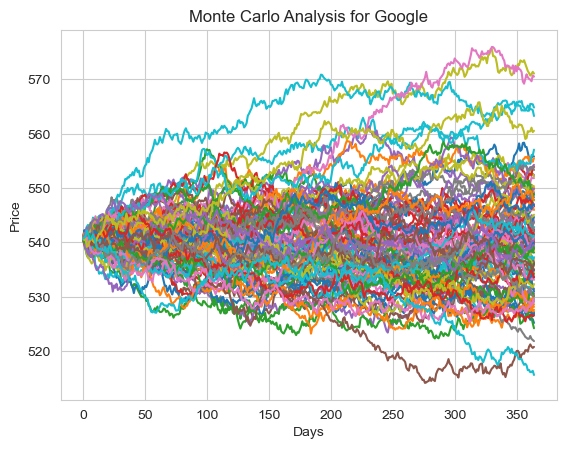

In [42]:
start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [43]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

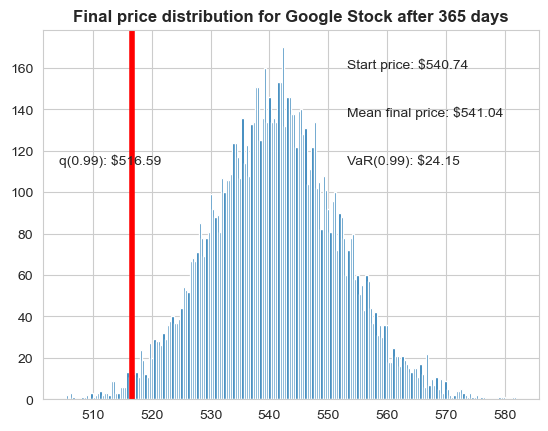

In [44]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

plt.figtext(0.6, 0.8, s = "Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" %(start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x = q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight = 'bold');